In [1]:
import numpy as np
import pandas as pd

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, roc_auc_score
from sklearn.model_selection import train_test_split, KFold, cross_val_predict
from collections import Counter
from scipy import stats

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier, VotingClassifier, RandomForestRegressor

import imblearn
from sklearn.ensemble import RandomForestClassifier
from sklearn.utils import resample
from sklearn.linear_model import LinearRegression, LogisticRegression, RidgeCV, Ridge
from sklearn.metrics import mean_absolute_error, mean_squared_error, make_scorer

import warnings
warnings.filterwarnings("ignore")
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, StandardScaler
from category_encoders import TargetEncoder



import xgboost as xgb
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from xgboost import XGBRegressor, XGBClassifier

from imblearn.over_sampling import RandomOverSampler, SMOTE
from imblearn.under_sampling import RandomUnderSampler
from sklearn.datasets import make_regression

import matplotlib.pyplot as plt
from scipy.stats import yeojohnson
import os
import seaborn as sns
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
import sklearn.metrics as metrics
from sklearn.metrics import confusion_matrix

## load dataset

In [2]:
data = pd.read_csv("InsNova_data_2023_train.csv", index_col='id')


In [3]:
data.head()

,veh_value,exposure,veh_body,veh_age,gender,area,agecat,engine_type,max_power,driving_history_score,...,marital_status,e_bill,time_of_week_driven,time_driven,trm_len,credit_score,high_education_ind,clm,numclaims,claimcst0
id,,,,,,,,,,,,,,,,,,,,,
1,0.77,0.444504,SEDAN,4,M,D,3,petrol,147,67.0,...,S,1,weekday,6pm - 12am,6,640.448137,1.0,0,0,0.0
2,4.45,0.562183,STNWG,1,M,A,3,petrol,158,76.0,...,S,1,weekday,6am - 12pm,12,683.749691,0.0,0,0,0.0
3,4.90,0.465244,STNWG,1,F,A,3,petrol,159,58.0,...,M,1,weekday,6pm - 12am,6,653.656117,1.0,0,0,0.0
4,0.48,0.271039,PANVN,4,M,A,4,petrol,80,72.0,...,S,1,weekday,12pm - 6pm,12,642.574671,0.0,0,0,0.0
5,0.85,0.141624,SEDAN,4,F,A,5,petrol,126,91.0,...,S,0,weekday,6am - 12pm,6,647.175035,0.0,0,0,0.0


In [4]:
# check for null values
data.isnull().sum()

veh_value                0
exposure                 0
veh_body                 0
veh_age                  0
gender                   0
area                     0
agecat                   0
engine_type              0
max_power                0
driving_history_score    0
veh_color                0
marital_status           0
e_bill                   0
time_of_week_driven      0
time_driven              0
trm_len                  0
credit_score             0
high_education_ind       0
clm                      0
numclaims                0
claimcst0                0
dtype: int64

In [5]:
# plt.figure(figsize=(20,20))
# newdata = data.drop(['clm', 'numclaims', 'claimcst0'], axis=1)
# sns.heatmap(newdata.corr(), annot=True)
# plt.show()

In [6]:
data.columns

Index(['veh_value', 'exposure', 'veh_body', 'veh_age', 'gender', 'area',
       'agecat', 'engine_type', 'max_power', 'driving_history_score',
       'veh_color', 'marital_status', 'e_bill', 'time_of_week_driven',
       'time_driven', 'trm_len', 'credit_score', 'high_education_ind', 'clm',
       'numclaims', 'claimcst0'],
      dtype='object')

## Handling Categorical Features and Transforming Integer Features

In [7]:
data["high_education_ind"] = (data["high_education_ind"]).astype(int)

In [8]:
def transform_to_object(lis, x):
    for i in lis:
        x[lis] = x[lis].astype(str)

In [9]:
transform_to_object(['veh_age', 'agecat', 'e_bill', 'trm_len', 'high_education_ind'], data)

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22619 entries, 1 to 22619
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   veh_value              22619 non-null  float64
 1   exposure               22619 non-null  float64
 2   veh_body               22619 non-null  object 
 3   veh_age                22619 non-null  object 
 4   gender                 22619 non-null  object 
 5   area                   22619 non-null  object 
 6   agecat                 22619 non-null  object 
 7   engine_type            22619 non-null  object 
 8   max_power              22619 non-null  int64  
 9   driving_history_score  22619 non-null  float64
 10  veh_color              22619 non-null  object 
 11  marital_status         22619 non-null  object 
 12  e_bill                 22619 non-null  object 
 13  time_of_week_driven    22619 non-null  object 
 14  time_driven            22619 non-null  object 
 15  tr

In [11]:
# pd.set_option("display.max_rows", None)

# data.claimcst0.value_counts().sort_index()

## Visualize continuous features and transformation 

### Boxplot for 'max_power'

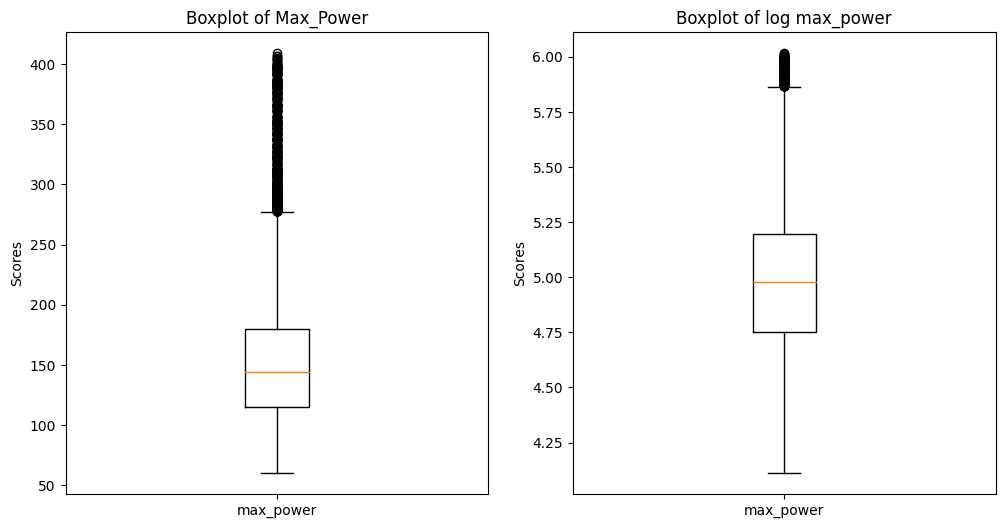

In [12]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.boxplot(data['max_power'], 
            labels=['max_power'])

plt.title('Boxplot of Max_Power')
plt.ylabel('Scores')


plt.subplot(1, 2, 2)
plt.boxplot(np.log1p(data['max_power']), 
            labels=['max_power'])

plt.title('Boxplot of log max_power')
plt.ylabel('Scores')
plt.show()
plt.show()

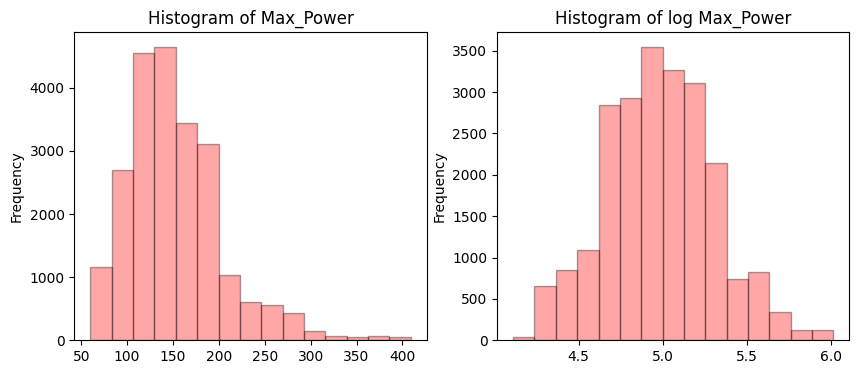

In [13]:
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.hist(data['max_power'], bins=15, color= 'red', alpha=.35, edgecolor='black')
plt.title('Histogram of Max_Power')
plt.ylabel('Frequency')


plt.subplot(1, 2, 2)
plt.hist(np.log1p(data['max_power']), bins=15, color= 'red', alpha=.35, edgecolor='black')
plt.title('Histogram of log Max_Power')
plt.ylabel('Frequency')

plt.show()
plt.show()

data['max_power'] = np.log1p(data['max_power'])

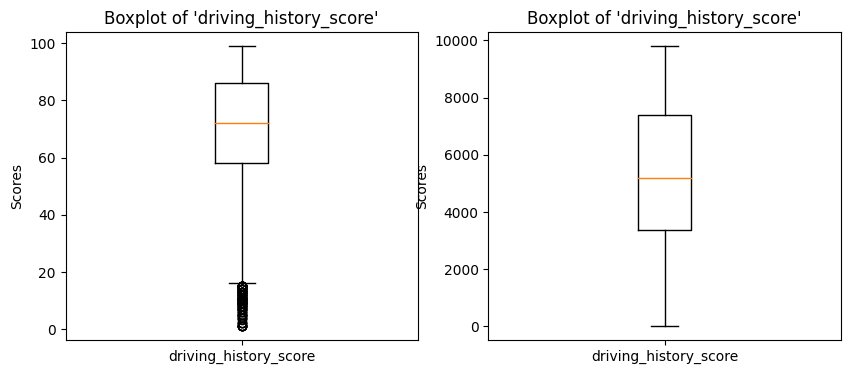

In [14]:
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.boxplot(data['driving_history_score'], 
            labels=['driving_history_score'])

plt.title("Boxplot of 'driving_history_score'")
plt.ylabel('Scores')


plt.subplot(1, 2, 2)
plt.boxplot(np.square(data['driving_history_score']), 
            labels=['driving_history_score'])

plt.title("Boxplot of 'driving_history_score'")
plt.ylabel('Scores')
plt.show()
plt.show()

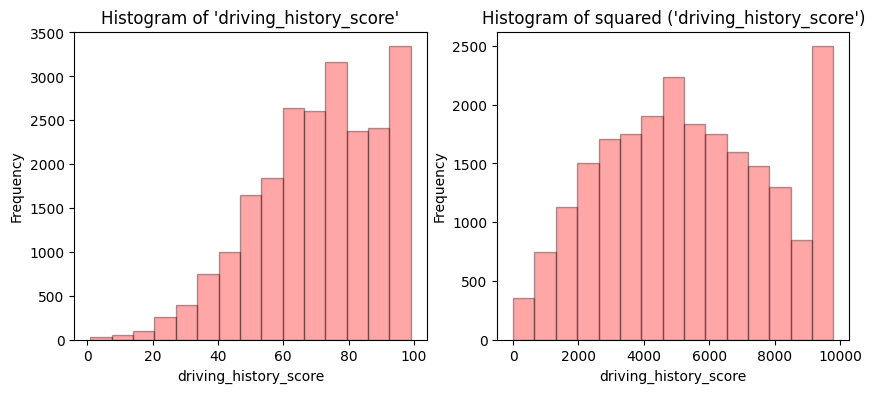

In [15]:
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.hist(data['driving_history_score'], bins=15, color= 'red', alpha=.35, edgecolor='black')

plt.title("Histogram of 'driving_history_score'")
plt.xlabel('driving_history_score')
plt.ylabel('Frequency')


plt.subplot(1, 2, 2)
plt.hist(np.square(data['driving_history_score']), bins=15, color= 'red', alpha=.35, edgecolor='black')

plt.title("Histogram of squared ('driving_history_score')")
plt.xlabel('driving_history_score')
plt.ylabel('Frequency')
plt.show()
plt.show()

data['driving_history_score'] = np.square(data['driving_history_score'])

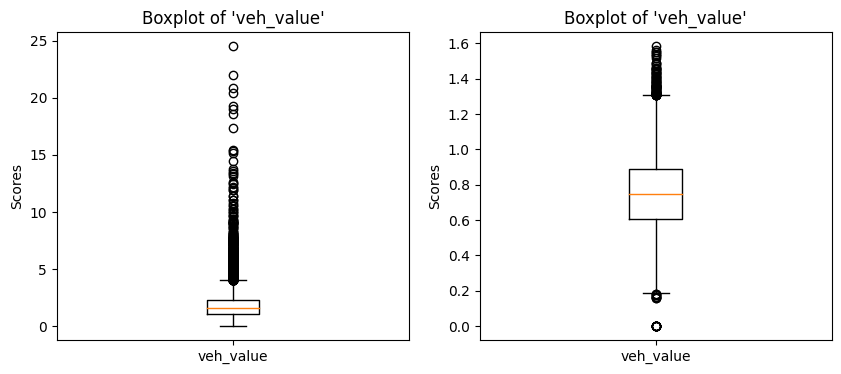

In [16]:
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.boxplot(data['veh_value'], 
            labels=['veh_value'])

plt.title("Boxplot of 'veh_value'")
plt.ylabel('Scores')


plt.subplot(1, 2, 2)
plt.boxplot(yeojohnson(data['veh_value'])[0], 
            labels=['veh_value'])

plt.title("Boxplot of 'veh_value'")
plt.ylabel('Scores')
plt.show()
plt.show()

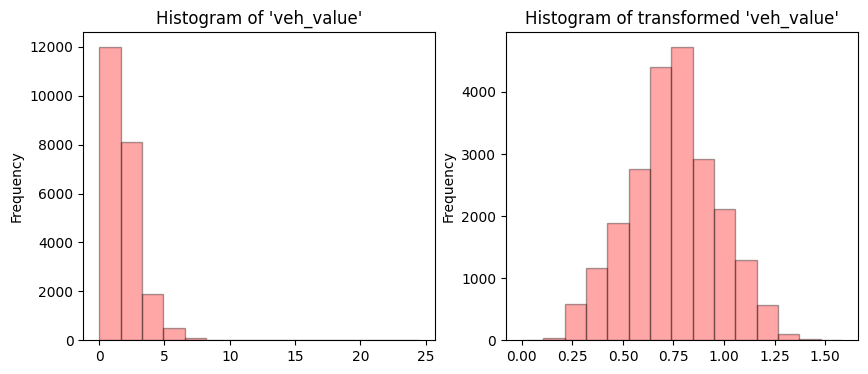

In [17]:
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.hist((data['veh_value']), bins=15, color= 'red', alpha=.35, edgecolor='black')

plt.title("Histogram of 'veh_value'")
plt.ylabel('Frequency')


plt.subplot(1, 2, 2)
plt.hist(yeojohnson(data['veh_value'])[0], bins=15, color= 'red', alpha=.35, edgecolor='black')

plt.title("Histogram of transformed 'veh_value'")
plt.ylabel('Frequency')
plt.show()
plt.show()

data['veh_value'] = yeojohnson(data['veh_value'])[0]

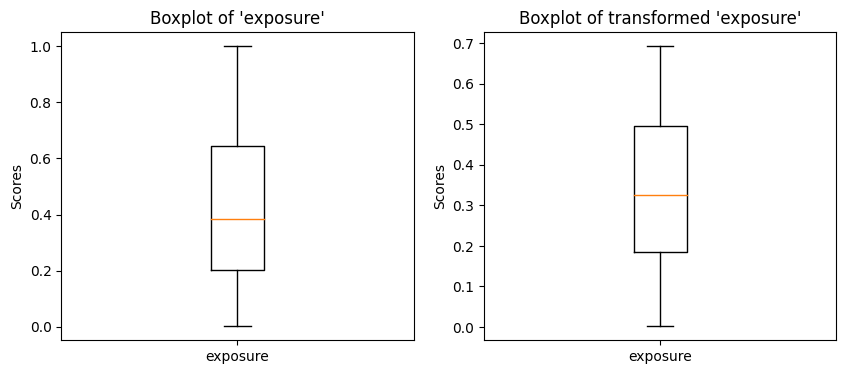

In [18]:
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.boxplot(data['exposure'], 
            labels=['exposure'])

plt.title("Boxplot of 'exposure'")
plt.ylabel('Scores')


plt.subplot(1, 2, 2)
plt.boxplot(np.log1p(data['exposure']), 
            labels=['exposure'])

plt.title("Boxplot of transformed 'exposure'")
plt.ylabel('Scores')
plt.show()
plt.show()


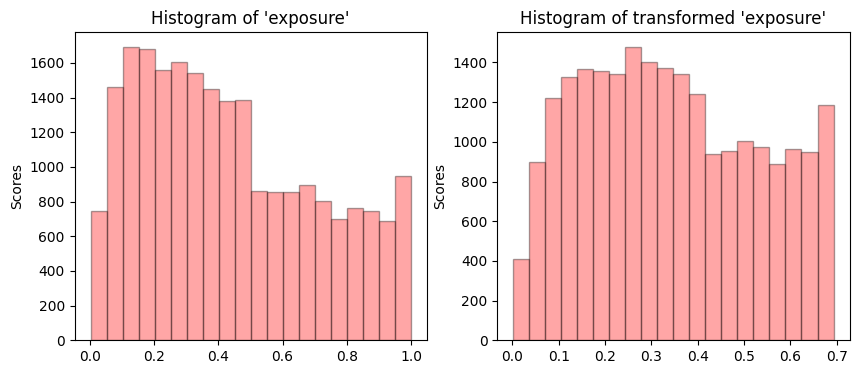

In [19]:
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.hist(data['exposure'], bins=20, color= 'red', alpha=.35, edgecolor='black')

plt.title("Histogram of 'exposure'")
plt.ylabel('Scores')


plt.subplot(1, 2, 2)
plt.hist(np.log1p(data['exposure']), bins=20, color= 'red', alpha=.35, edgecolor='black')

plt.title("Histogram of transformed 'exposure'")
plt.ylabel('Scores')
plt.show()
plt.show()

data['exposure'] = np.log1p(data['exposure'])

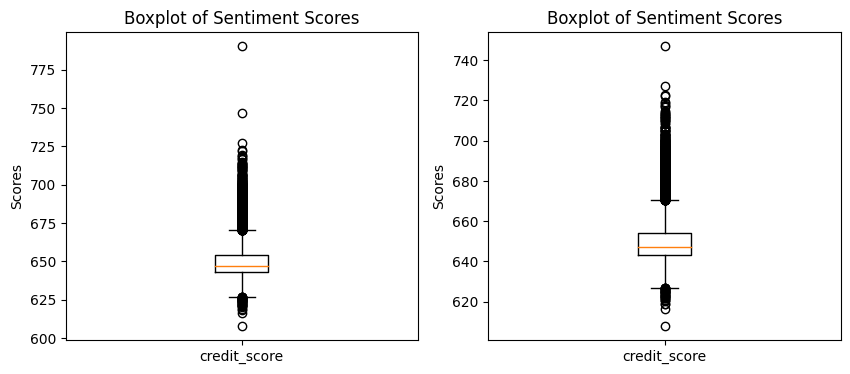

In [20]:
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.boxplot(data['credit_score'], 
            labels=['credit_score'])

plt.title('Boxplot of Sentiment Scores')
plt.ylabel('Scores')

data.drop(data[data['credit_score'] > 750].index, inplace=True)

plt.subplot(1, 2, 2)
plt.boxplot(data['credit_score'], 
            labels=['credit_score'])

plt.title('Boxplot of Sentiment Scores')
plt.ylabel('Scores')

plt.show()
plt.show()

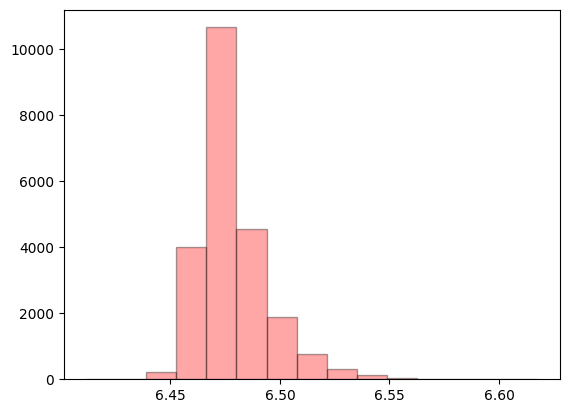

In [21]:
plt.hist(np.log1p(data['credit_score']), bins=15, color= 'red', alpha=.35, edgecolor='black')
plt.show()

data['credit_score'] = np.log1p(data['credit_score'])

In [22]:
sorted(data['claimcst0'], reverse=True)[:10]

[57895.58456,
 56003.82641,
 36312.62442,
 33895.13576,
 33433.16938,
 29661.34782,
 29614.53557,
 23942.69883,
 23488.52221,
 22587.59574]

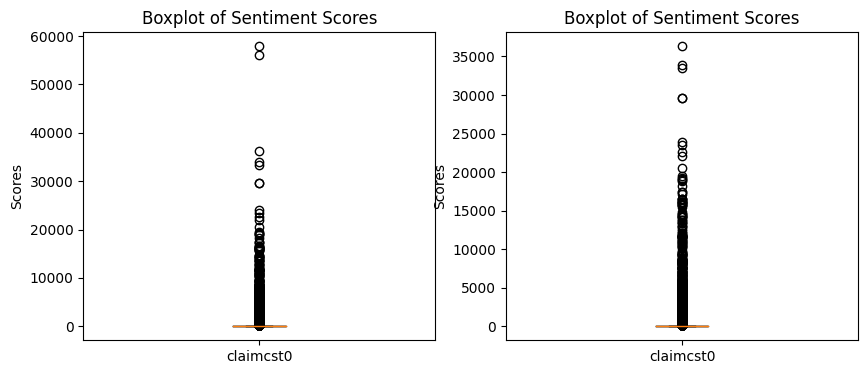

In [23]:
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.boxplot(data['claimcst0'], 
            labels=['claimcst0'])

plt.title('Boxplot of Sentiment Scores')
plt.ylabel('Scores')

data = data.drop(data[data['claimcst0'] > 50000].index)

plt.subplot(1, 2, 2)
plt.boxplot(data['claimcst0'], 
            labels=['claimcst0'])

plt.title('Boxplot of Sentiment Scores')
plt.ylabel('Scores')
plt.show()
plt.show()



In [24]:
a, b = (len(data[data['claimcst0'] == 0])/data.shape[0]), (len(data[data['claimcst0'] > 0])/data.shape[0])
print(f"The percentage of Zero Claim Cost: {np.round(a*100, 2)}%")
print(f"The percentage of Claim Cost NOT Zero: {np.round(b*100, 2)}%")

The percentage of Zero Claim Cost: 93.2%
The percentage of Claim Cost NOT Zero: 6.8%


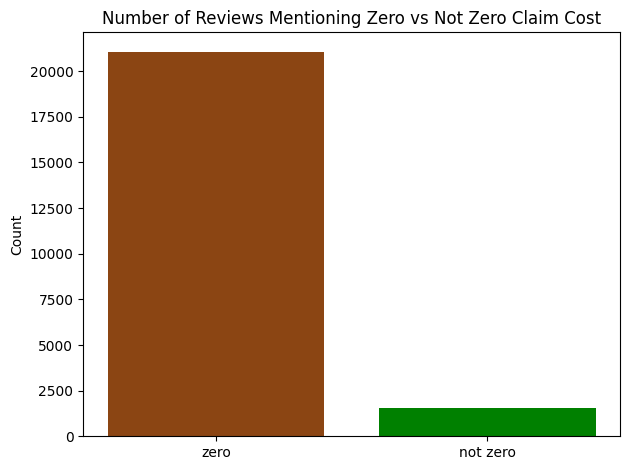

In [25]:

# Create a bar chart
plt.bar(['zero', 'not zero'], [len(data[data['claimcst0'] == 0]), len(data[data['claimcst0'] > 0])], color=['saddlebrown', 'green'],
       width=0.8)

plt.title('Number of Reviews Mentioning Zero vs Not Zero Claim Cost')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

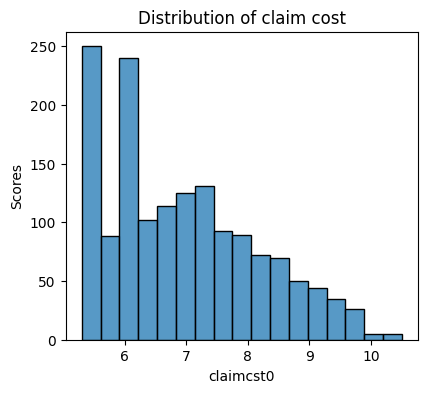

In [26]:
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
sns.histplot(np.log1p((data[data['claimcst0'] > 0]['claimcst0'])))

plt.title('Distribution of claim cost')
plt.ylabel('Scores')

data['claimcst0'] = np.log1p(data['claimcst0'])

In [27]:
def encoder(x):
    for column in x.columns:
        if x[column].dtype == 'object':
            target_encoder = TargetEncoder()
            x[column] = target_encoder.fit_transform(x[column], data['claimcst0'])
    return x

In [28]:
scaler1 = MinMaxScaler()
scaler2 = MinMaxScaler()

In [29]:
data = encoder(data)
Y = data['claimcst0']
data.drop(['claimcst0'], axis=1, inplace=True)
data_norm = scaler1.fit_transform(data)
data = pd.DataFrame(data_norm, columns=data.columns)
Y = scaler2.fit_transform(np.array(Y).reshape(-1, 1))

## Respose and Target variable

## Train test split

In [30]:
x_train, x_test, y_train, y_test = train_test_split(data, Y, test_size=0.1, random_state=5400)

In [31]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((20354, 20), (2262, 20), (20354, 1), (2262, 1))

In [32]:
x_train_clm = x_train.iloc[:, :-2]

In [33]:
y_train_clm = x_train.iloc[:, -2]

In [34]:
x_train_numclm = x_train.iloc[:, :-1]

In [35]:
y_train_numclm = x_train.iloc[:, -1]

In [36]:
x_test_clm = x_test.iloc[:, :-2]

In [37]:
x_test_numclm = x_test.iloc[:, :-1]

In [38]:
y_test_clm = x_test.iloc[:, -2]

In [39]:
y_test_numclm = x_test.iloc[:, -1]

## 3. Random under-sampling with imblearn

In [40]:
# df_train = pd.concat([x_train_clm, y_train_clm], axis=1)
# majority_class = df_train[df_train['clm'] == 0]
# minority_class = df_train[df_train['clm'] == 1]
# majority_class.shape, minority_class.shape
# majority_class_undersampled = resample(majority_class, replace=False, n_samples=10000, random_state=42)
# minority_class_oversampled = resample(minority_class, replace=True, n_samples=5000, random_state=42)
# minority_class_oversampled.shape, majority_class_undersampled.shape
# undersampled_df = pd.concat([minority_class_oversampled, majority_class_undersampled])
# y_train_clm = undersampled_df["clm"]
# undersampled_df.drop(["clm"], axis=1, inplace=True)
# x_train_clm = undersampled_df

In [41]:
ros = RandomOverSampler(random_state=42)
rus = RandomUnderSampler(random_state=42)
sm = SMOTE(random_state=42)
x_ros, y_ros = ros.fit_resample(x_train_clm, y_train_clm)
x_rus, y_rus = rus.fit_resample(x_train_clm, y_train_clm)
x_sm, y_sm = sm.fit_resample(x_train_clm, y_train_clm)

In [ ]:
x_ros.shape, y_ros.shape, x_rus.shape, y_rus.shape, x_sm.shape, y_sm.shape

In [ ]:
from sklearn.utils.class_weight import compute_class_weight

# Calculate class weights using 'balanced' strategy
weights = compute_class_weight('balanced', classes=[0, 1], y=y_train_clm)

# Display the calculated class weights
print("Class Weights:", weights)


In [ ]:
'n_estimators': [50, 100, 200, 300, 500, 1000],
        'max_depth': [50, 100, 200, 500, 1000],
        'max_leaf_nodes': [10, 20, 50, 100, 200],
        'class_weight': [{0: 0.75, 1: 1.5}, {0: 0.5, 1: 1}, {0: 0.7, 1: 2}, {0: 1, 1: 2.5}, {0: 1, 1: 3}],
        'max_features': ['sqrt', 'log2'],
        'min_samples_leaf': [2, 3, 5, 10, 50]

In [ ]:
mod = GridSearchCV(
    estimator=RandomForestClassifier(random_state=5400), 
    param_grid={
        'n_estimators': [100],
        'max_depth': [200],
        'max_leaf_nodes': [200],
        'class_weight': [{0: 1, 1: 1}],
        'max_features': ['sqrt'],
        'min_samples_leaf': [3]
        
        },
    cv=5)

In [ ]:
mod.fit(x_ros, y_ros)

In [ ]:
pred = mod.predict(x_test_clm)
m = metrics.confusion_matrix(y_test_clm, pred)

In [ ]:
# check performance
roc = roc_auc_score(y_test_clm, pred)
acc = accuracy_score(y_test_clm, pred)
f1 = f1_score(y_test_clm, pred)

print(f'ROCAUC score: {roc}')
print(f'Accuracy score: {acc}')
print(f'F1 score: {f1}')

In [ ]:
n = [['NS', 5, m, roc, acc, f1]]
col = ['sampling', 'fold', 'conf_matrix', 'roc_curve', 'accurancy', 'f1_score']

In [ ]:
# results = pd.DataFrame(columns=col)

In [ ]:
results = results.append(pd.DataFrame(n, columns=col), ignore_index=True)

In [ ]:
results

In [45]:

# ada_clf = XGBClassifier(n_estimators=100, max_depth= 1, 
#                         max_leaves = 5, learning_rate=0.1)
mod2 = GridSearchCV(
    estimator=XGBClassifier(random_state=5400), 
    param_grid={
        'n_estimators': [100, 200, 300],
        'max_depth': [1, 2, 3, 5],
        'max_leaves': [1, 2, 3, 5],
        'learning_rate': [0.1, 0.01, 0.5, 0.05]
        
        },
    cv=5)

In [46]:
mod2.fit(x_ros, y_ros)

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=5400, ...),
             param_grid={'learning_rate': [0.1, 0.01, 0.5, 0.05],
                         'max_depth': [1, 2, 3, 5], 'max_leaves': [1, 2, 3, 5],
                         'n_estimators': [100, 200, 300]})

In [47]:
pred2 = mod2.predict(x_test_clm)

In [48]:
print('ROCAUC score:',roc_auc_score(y_test_clm, pred2))
print('Accuracy score:',accuracy_score(y_test_clm, pred2))
print('F1 score:',f1_score(y_test_clm, pred2))

ROCAUC score: 0.5810301820902969
Accuracy score: 0.6967285587975243
F1 score: 0.1654501216545012


In [49]:
confusion_matrix(y_test_clm, pred2)

array([[1508,  602],
       [  84,   68]])

In [ ]:
m = metrics.confusion_matrix(y_test_clm, pred2)
roc = roc_auc_score(y_test_clm, pred2)
acc = accuracy_score(y_test_clm, pred2)
f1 = f1_score(y_test_clm, pred2)
n = [['SM', 'XGBClassifier', 5, m, roc, acc, f1]]
col = ['sampling', 'model', 'fold', 'conf_matrix', 'roc_curve', 'accurancy', 'f1_score']
results = results.append(pd.DataFrame(n, columns=col), ignore_index=True)

In [58]:
mod2.best_params_ 

{'learning_rate': 0.5, 'max_depth': 5, 'max_leaves': 5, 'n_estimators': 300}

In [ ]:
import pickle
filename = f'XGBClassification.sav'
pickle.dump(mod2.best_estimator_, open(filename, 'wb'))

In [ ]:
import pickle
filename = f'RandomForest.sav'
pickle.dump(mod.best_estimator_, open(filename, 'wb'))

In [ ]:
results.to_csv('results.csv', index=False) 

In [ ]:
model_XGBClass = pickle.load(open('XGBClassification.sav', 'rb'))
model_rfc = pickle.load(open('RandomForest.sav', 'rb'))

In [ ]:
model_XGBClass

In [85]:
from sklearn.neighbors import NearestCentroid

mod3 = GridSearchCV(
    estimator=NearestCentroid(), 
    param_grid={
        'metric': ['euclidean']
        },
    cv=5)

In [92]:
mod3.fit(x_ros, y_ros)

GridSearchCV(cv=5, estimator=NearestCentroid(),
             param_grid={'metric': ['euclidean']})

In [93]:
near_pred = mod3.predict(x_test_clm)

In [94]:
print('ROCAUC score:',roc_auc_score(y_test_clm, near_pred))
print('Accuracy score:',accuracy_score(y_test_clm, near_pred))
print('F1 score:',f1_score(y_test_clm, near_pred))

ROCAUC score: 0.605060488899975
Accuracy score: 0.7130857648099027
F1 score: 0.18364779874213838


In [ ]:
confusion_matrix(y_test_clm, near_pred)

In [ ]:
m = metrics.confusion_matrix(y_test_clm, near_pred)
roc = roc_auc_score(y_test_clm, near_pred)
acc = accuracy_score(y_test_clm, near_pred)
f1 = f1_score(y_test_clm, near_pred)
n = [['SM', 'NearestCentroid', 5, m, roc, acc, f1]]
col = ['sampling', 'model', 'fold', 'conf_matrix', 'roc_curve', 'accurancy', 'f1_score']
results = results.append(pd.DataFrame(n, columns=col), ignore_index=True)

In [ ]:
results

In [ ]:
from sklearn.svm import SVC

mod4 = GridSearchCV(
    estimator=SVC(random_state=5400), 
    param_grid={
        'kernel': ['poly', 'rbf', 'sigmoid'],
        'class_weight': [{0: 1, 1: 1}, {0: 0.5, 1: 1}, {0: 0.5, 1: 1.5}]
        },
    cv=5)

In [ ]:
mod4.fit(x_ros, y_ros)

In [ ]:
pred_KNNC = mod4.predict(x_test_clm)

In [ ]:
print('ROCAUC score:',roc_auc_score(y_test_clm, pred_KNNC))
print('Accuracy score:',accuracy_score(y_test_clm, pred_KNNC))
print('F1 score:',f1_score(y_test_clm, pred_KNNC))
confusion_matrix(y_test_clm, pred_KNNC)

In [ ]:
m = confusion_matrix(y_test_clm, pred_KNNC)
roc = roc_auc_score(y_test_clm, pred_KNNC)
acc = accuracy_score(y_test_clm, pred_KNNC)
f1 = f1_score(y_test_clm, pred_KNNC)
n = [['ROS', 'SVC', 5, m, roc, acc, f1]]
col = ['sampling', 'model', 'fold', 'conf_matrix', 'roc_curve', 'accurancy', 'f1_score']
results = results.append(pd.DataFrame(n, columns=col), ignore_index=True)

In [ ]:
results

In [97]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.neighbors import NearestCentroid



pipeline = make_pipeline(
    StandardScaler(),
    VotingClassifier([
        ('rfc', RandomForestClassifier(n_estimators=100,
                             max_depth= 200,
                             max_leaf_nodes=200, 
                             class_weight={0: 1, 1: 1},
                             min_samples_leaf=3
                             )),
        ('xgb', XGBClassifier(n_estimators=300,
                              max_depth= 2, 
                              max_leaves = 5, 
                              learning_rate=0.5)),
        ('Near_Cent', NearestCentroid())

    ])
)

# Fit the pipeline on the training data
pipeline.fit(x_ros, y_ros)

# Predict on the test data
y_pred = pipeline.predict(x_test_clm)

# Evaluate the model using mean squared error
# mse = mean_squared_error(y_test, y_pred)
# print("Mean Squared Error:", mse)
print('ROCAUC score:',roc_auc_score(y_test_clm, y_pred))
print('Accuracy score:',accuracy_score(y_test_clm, y_pred))
print('F1 score:',f1_score(y_test_clm, y_pred))
matrix = confusion_matrix(y_test_clm, y_pred)
print(matrix)


ROCAUC score: 0.6232913444749314
Accuracy score: 0.695844385499558
F1 score: 0.19248826291079812
[[1492  618]
 [  70   82]]


In [99]:
import pickle
filename = f'Pipeline.sav'
pickle.dump(pipeline, open(filename, 'wb'))

In [66]:
m = confusion_matrix(y_test_clm, y_pred)
roc = roc_auc_score(y_test_clm, y_pred)
acc = accuracy_score(y_test_clm, y_pred)
f1 = f1_score(y_test_clm, y_pred)
n = [['ROS', 'Pipeline', 5, m, roc, acc, f1]]
col = ['sampling', 'model', 'fold', 'conf_matrix', 'roc_curve', 'accurancy', 'f1_score']
results = results.append(pd.DataFrame(n, columns=col), ignore_index=True)

NameError: name 'results' is not defined

In [ ]:
# results

In [ ]:
mod_LogReg = GridSearchCV(
    estimator=LogisticRegression(), 
    param_grid={
        'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
        'penalty': ['l1', 'l2']
        },
    cv=5)

In [ ]:
mod_LogReg.fit(x_train_clm, y_train_clm)

In [ ]:
pred_LogReg = mod_LogReg.predict(x_test_clm)

In [ ]:
print('ROCAUC score:',roc_auc_score(y_test_clm, pred_LogReg))
print('Accuracy score:',accuracy_score(y_test_clm, pred_LogReg))
print('F1 score:',f1_score(y_test_clm, pred_LogReg))
confusion_matrix(y_test_clm, pred_LogReg)

In [ ]:
m = confusion_matrix(y_test_clm, y_pred)
roc = roc_auc_score(y_test_clm, y_pred)
acc = accuracy_score(y_test_clm, y_pred)
f1 = f1_score(y_test_clm, y_pred)
n = [['NS', 'LogisticRegression', 5, m, roc, acc, f1]]
col = ['sampling', 'model', 'fold', 'conf_matrix', 'roc_curve', 'accurancy', 'f1_score']
results = results.append(pd.DataFrame(n, columns=col), ignore_index=True)

## Numclaims

In [ ]:
# x_test['Pred_clm'] = rfc_predict
# x_train = pd.concat([X_train, y_train], axis=1)
# data1 = data.drop(['numclaims', 'claimcst0'], axis=1)

In [ ]:
# # df_train = pd.concat([x_train_numclm, y_train_numclm], axis=1)
# majority_class = df_train[df_train['numclaims'] == 0.000000]
# minority_class_1 = df_train[df_train['numclaims'] == 0.333333]
# minority_class_2 = df_train[df_train['numclaims'] == 0.666667]
# minority_class_3 = df_train[df_train['numclaims'] == 1.000000]
# majority_class.shape, minority_class_1.shape, minority_class_2.shape, minority_class_3.shape
# majority_class_undersampled = resample(majority_class, replace=True, n_samples=10000, random_state=42)
# minority_class1_oversampled = resample(minority_class_1, replace=True, n_samples=5000, random_state=42)
# minority_class2_oversampled = resample(minority_class_2, replace=True, n_samples=500, random_state=42)
# minority_class3_oversampled = resample(minority_class_3, replace=True, n_samples=500, random_state=42)
# undersampled_df = pd.concat([majority_class_undersampled, minority_class1_oversampled, minority_class2_oversampled, minority_class3_oversampled], axis=0)
# y_train_numclm = undersampled_df["numclaims"]
# undersampled_df.drop(["numclaims"], axis=1, inplace=True)
# x_train_numclm = undersampled_df

In [ ]:
model_Reg = GridSearchCV(
    estimator=RandomForestRegressor(random_state=5400), 
    param_grid={
        'n_estimators': [100, 200, 300],
        'criterion': ['squared_error'],
        'max_depth': [200, 300],
        'max_leaf_nodes': [100, 200]
        
        },
    cv=5)

In [ ]:
model_Reg.fit(x_train_numclm, y_train_numclm)

In [ ]:
pred_RF_reg = model_Reg.predict(x_test_numclm)

In [ ]:
mean_squared_error(y_test_numclm, pred_RF_reg)

In [ ]:
# Train XGBoost model

model_XGBR = GridSearchCV(
    estimator=XGBRegressor(random_state=5400), 
    param_grid = {'n_estimators': [50, 100, 200], 
                  'learning_rate': [0.001, 0.01, 0.1], 
                  'max_depth': [3, 5, 7], 
                  'min_child_weight': [1, 3, 5], 
                  'subsample': [0.8, 0.9, 1.0], 
                  'colsample_bytree': [0.8, 0.9, 1.0]
     
        },
    cv=10)
model_XGBR.fit(x_train_numclm, y_train_numclm)

In [ ]:
import pickle
filename = f'XGBRegressor_numclm.sav'
pickle.dump(model_XGBR.best_estimator_, open(filename, 'wb'))

In [ ]:
pred_xgb = model_XGBR.predict(x_test_numclm)
mean_squared_error(y_test_numclm, pred_xgb)

In [ ]:
col1 = ['model', 'fold', 'mse', 'mae', 'r^2']
mse = mean_squared_error(y_test_numclm, pred_xgb)
mae = mean_absolute_error(y_test_numclm, pred_xgb)
r2 = r2_score(y_test_numclm, pred_xgb)
n1 = [['XGBRegressor', 5, mse, mae, r2]]
results_2 = pd.read_csv('results_2_new.csv')
# results_2 = results_2.append(pd.DataFrame(n1, columns=col1), ignore_index=True)

In [ ]:
results_2.to_csv('results_2_new.csv', index=False)

In [ ]:
from sklearn.linear_model import LassoCV, ElasticNetCV

In [ ]:
ridge = ElasticNetCV(cv=5)
ridge.fit(x_train_numclm, y_train_numclm)

In [ ]:
pred_ridge = ridge.predict(x_test_numclm)

In [ ]:
mean_squared_error(y_test_numclm, pred_ridge)

In [ ]:
col1 = ['model', 'fold', 'mse', 'mae']
mse = mean_squared_error(y_test_numclm, pred_ridge)
mae = mean_absolute_error(y_test_numclm, pred_ridge)
n1 = [['SVR', 5, mse, mae]]
results_2 = results_2.append(pd.DataFrame(n1, columns=col1), ignore_index=True)
results_2

In [ ]:
results_2

## ClaimCost0

In [ ]:
df_train = pd.concat([x_train, y_train], axis=1)
majority_class = df_train[df_train['claimcst0'] == 0]
minority_class = df_train[df_train['claimcst0'] > 0]
majority_class.shape, minority_class.shape
majority_class_undersampled = resample(majority_class, replace=True, n_samples=15000, random_state=42)
minority_class_oversampled = resample(minority_class, replace=True, n_samples=5000, random_state=42)
minority_class_oversampled.shape, majority_class_undersampled.shape
undersampled_df = pd.concat([minority_class_oversampled, majority_class_undersampled])
y_train = undersampled_df["claimcst0"]
undersampled_df.drop(["claimcst0"], axis=1, inplace=True)
x_train = undersampled_df

In [ ]:
def calculate_gini_index(yTarget, yPred):
    # Combine the target values and predicted values into a 2D array
    combined_data = np.column_stack((yTarget, yPred))

    # Sort the array based on predicted values
    sorted_data = combined_data[combined_data[:, 1].argsort()]

    # Calculate cumulative sums of the target values
    cumsum_target = np.cumsum(sorted_data[:, 0])

    # Calculate Gini index components
    numerator = np.sum(sorted_data[:, 0] * sorted_data[:, 1]) / np.sum(sorted_data[:, 0])
    denominator = np.sum(cumsum_target) / len(yTarget)

    # Calculate Gini index
    gini_index = (numerator - denominator) / (denominator - np.sum((len(yTarget) - np.arange(1, len(yTarget) + 1)) / len(yTarget)))

    return gini_index


In [ ]:
# Define your XGBoost regressor
xgb_regressor = RandomForestRegressor(n_estimators=500, max_depth=10)

# xgb.XGBRegressor(booster='gbtree', learning_rate = 0.05, min_child_weight = 2, 
#                             max_leaves = 5, max_bin=5)

# Define the number of folds for cross-validation
num_folds = 5

# Create a KFold object
kf = KFold(n_splits=num_folds, shuffle=True, random_state=42)



# Iterate through each fold of the cross-validation
for train_index, test_index in kf.split(data1):
    # Split the data into training and validation sets
    X_train, X_val = data1.iloc[train_index], data1.iloc[test_index]
    y_train, y_val = Y.iloc[train_index], Y.iloc[test_index]
    

    # Train the XGBoost regressor on the resampled data
    xgb_regressor.fit(X_train, y_train)

    # Predict on the validation set
    y_pred = xgb_regressor.predict(X_val)

    # Evaluate the model using the Gini index
    gini_score = calculate_gini_index(y_val, y_pred)
    print(f"mean_squared_error: {mean_squared_error(y_val, y_pred)}")
    print("Validation Gini Index:", gini_score)


## Inference

In [ ]:
Validation_data = pd.read_csv("InsNova_data_2023_vh.csv", index_col='id')

In [ ]:
Validation_data['exposure'] = yeojohnson(Validation_data.exposure.values)[0]

In [ ]:
# pd.reset_option("display.max_rows")
Validation_data['veh_value'] = np.log1p(Validation_data.veh_value)

In [ ]:
Validation_data['credit_score'] = np.sqrt(Validation_data.credit_score)

In [ ]:
Validation_data['max_power'] = np.log1p(Validation_data['max_power'])

In [ ]:
Validation_data['driving_history_score'] = np.square(Validation_data['driving_history_score'])

In [ ]:
Validation_data["high_education_ind"] = (Validation_data["high_education_ind"]).astype(int)

In [ ]:
transform_to_object(['veh_age', 'agecat', 'e_bill', 'trm_len', 'high_education_ind'], Validation_data)

In [ ]:
encoder(Validation_data)

In [ ]:
Validation_data.info()

## Predicting 'clm' on Validation data

In [ ]:
rfc_predict_vh = ada_clf.predict(Validation_data)

In [ ]:
# Add the NumPy array as a new column named 'C'
Validation_data['clm'] = rfc_predict_vh



## Predicting 'numclaims' on Validation data

In [ ]:
pred_xgb_vh = model_Reg.predict(Validation_data)

In [ ]:
Validation_data['numclaims'] = pred_xgb_vh

In [ ]:
Validation_data['numclaims'] = abs(np.round(Validation_data.numclaims)).astype(int)

## Predicting 'claimcst0' on Validation data

In [ ]:
y_pred_clmcst_vh = xgb_regressor.predict(Validation_data)

In [ ]:
m = np.exp(y_pred_clmcst_vh)
m = np.round(m, 2)
m[m < 5] = 0

In [ ]:
Validation_data['claimcst0'] = m

In [ ]:
Validation_data['claimcst0'] = Validation_data['claimcst0'].apply(lambda x: round(x, 2))
Validation_data.head()

In [ ]:
if not os.path.isdir("2023_Travelers_Final_result"):
    os.mkdir("2023_Travelers_Final_result")

In [ ]:
with open("2023_Travelers_Final_result/Hawkeyed2023_8.csv", "w") as fw:
    # Write the header row.
    header = "id,Predict\n"
    fw.write(header)
    print(header, end="")            # Print the header row just to check the current status.
    
    # Write the value rows.
    for idx, row in Validation_data.iterrows():
        pred = round(row.claimcst0, 2)
        
        line = "{},{}\n".format(idx, pred)
        fw.write(line)


In [ ]:
trainDataset= pd.concat([x_train_clm, y_train_clm], axis=1)
trainDataset.to_csv('trainDataset.csv')

In [ ]:
trainDataset.columns, ValDataset.columns

In [ ]:
pwd

In [ ]:
ValDataset= pd.concat([x_test_clm, y_test_clm], axis=1)
ValDataset.to_csv('ValDataset.csv')